In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
size = 128

In [3]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape=(size,size, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


classifier.add(Flatten())


classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax'))

In [4]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set = train_datagen.flow_from_directory('train dataset/train',
                                                 target_size=(size, size),
                                                 batch_size=1,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

Found 12845 images belonging to 27 classes.


In [8]:
test_set = test_datagen.flow_from_directory('testing dataset/test',
                                            target_size=(size, size),
                                            batch_size=1,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 4268 images belonging to 27 classes.


In [10]:
classifier.fit(
        training_set,
        steps_per_epoch=12845,
        epochs=5,
        validation_data=test_set,
        validation_steps=4268)

Epoch 1/5
12845/12845 [==============================] - 699s 54ms/step - loss: 1.5792 - accuracy: 0.5067 - val_loss: 0.3178 - val_accuracy: 0.8929
Epoch 2/5
12845/12845 [==============================] - 543s 42ms/step - loss: 0.6991 - accuracy: 0.7726 - val_loss: 0.1542 - val_accuracy: 0.9442
Epoch 3/5
12845/12845 [==============================] - 565s 44ms/step - loss: 0.5079 - accuracy: 0.8369 - val_loss: 0.0782 - val_accuracy: 0.9761
Epoch 4/5
12845/12845 [==============================] - 564s 44ms/step - loss: 0.4174 - accuracy: 0.8725 - val_loss: 0.0760 - val_accuracy: 0.9791
Epoch 5/5
12845/12845 [==============================] - 562s 44ms/step - loss: 0.3862 - accuracy: 0.8834 - val_loss: 0.0261 - val_accuracy: 0.9934


In [9]:
print(len(training_set))
print(len(test_set))

12845
4268


In [11]:
model_json = classifier.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model-bw.h5')
print('Weights saved')

Model Saved
Weights saved


In [12]:
from keras.models import save_model
classifier.save('D:\jupyter projects ml\sign language\signlang_model1')

INFO:tensorflow:Assets written to: D:\jupyter projects ml\sign language\signlang_model1\assets


INFO:tensorflow:Assets written to: D:\jupyter projects ml\sign language\signlang_model1\assets


1/1 [==============================] - 0s 54ms/step
Q
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 6.8490574e-10 1.4608614e-19 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.3509650e-36]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.00

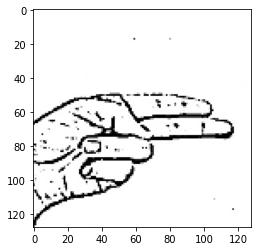

In [22]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
from string import ascii_uppercase
import numpy as np
img= cv2.imread('testing dataset/test/h/3.jpg')
test_img = cv2.resize(img,(128,128))
plt.imshow(test_img)
result = classifier.predict(test_img.reshape(-1,128, 128, 1))
prediction={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
         7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
         14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',
         21:'V',22:'W',23:'X',24:'Y',25:'Z'}
print(prediction[np.argmax(result)])
print(result)
